In [5]:
# Hyperparameters such as In Ridge, lasso ==> alpha, KNN ==> n_neighbors, metrics (euclidean, manhattan)
# Hyperparameter tuning is the process of finding the optimal set of hyperparameters for a machine learning model. 
"""
Choosing correct hyperparam

1. Try losts of diff hyperparam values. (Define a range of hyper paramters)
2. Fit of them separetely
3. See how well they perform
4. Choose the best performing values
---------------------------------------
It's called 'Hyper parameter Tuning.'

Lasso (L1 Regularization): The key hyperparameter is alpha, which controls the strength of the regularization. 
                           Higher alpha values can lead to more regularization (shrinking coefficients), 
                           while lower values allow the model to fit the training data more closely.

Ridge (L2 Regularization): Similar to Lasso, the hyperparameter alpha controls the strength of regularization, 
                           but it uses L2 regularization, which shrinks coefficients by the square of their magnitude.

K-Nearest Neighbors (KNN): The key hyperparameters include n_neighbors (the number of neighbors to consider) and 
                           the metric used to calculate the distance between data points.
                           
                           
"""
### Hyperparameter tuning with GridSearchCV => Lasso Reg

### GridSearchCV exhaustively searches through a specified hyperparameter grid and 
### evaluates model performance using cross-validation to find the best combination of hyperparameters.

from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np

# read df
diabetes_df= pd.read_csv('diabetes.csv')

# define fearture and target variables
X=diabetes_df.drop('Outcome',axis=1).values
y=diabetes_df['Outcome'].values

# split into train and test set
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=32)

#lasso reg
lasso=Lasso()

# Kfold for cross validation score
kf=KFold(n_splits=5 , shuffle= True, random_state=42)

# Set up the parameter grid

param_grid= {"alpha":np.linspace(0.00001,1,20)}

#lasso cv with GridSearchCV Instatiate
lasso_cv=GridSearchCV(lasso,param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train,y_train)

print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

### reg_cv.best_params_ ==> Returns the best combination of hyperparameters found during the search.
### reg_cv.best_score_ ==> Returns the best cross-validation score achieved by the model with the optimal set of hyperparameters.

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.24640192301500644


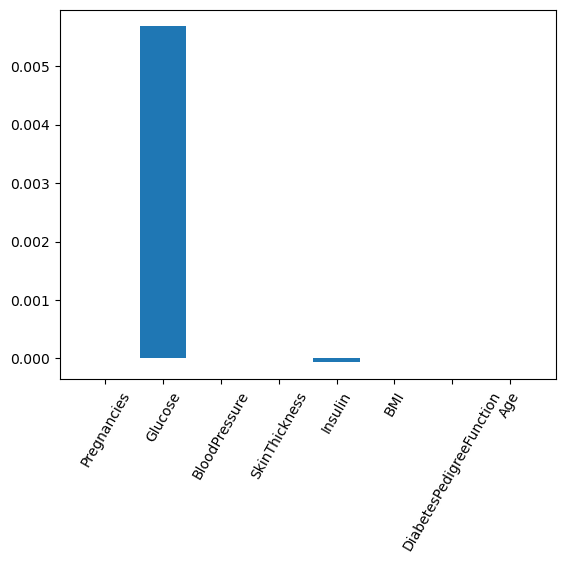

In [6]:
## Lasso Reg for feature Selection
### can select important features of a dataset
### shrink the coef ot less important features to 0

import matplotlib.pyplot as plt

names=diabetes_df.drop('Outcome',axis=1).columns
lasso_coef=lasso.fit(X_train,y_train).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=60)
plt.show()

In [26]:
### Hyperparameter Tuning with GridSearchCV => Ridge Reg

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Scaling the features is important 
# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


# Set up the parameter grid
## solver: Different solvers to optimize the Ridge regression, specifically sag (Stochastic Average Gradient) and 
## lsqr (Least Squares).
param_grid= {"alpha": np.arange(0.0001,1,10), 
             "solver":['sag', 'lsqr']
            }
ridge=Ridge()
# Instatiate to ridge reg
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)

ridge_cv.fit(X_train_scaled,y_train)

y_train_pred=ridge_cv.predict(X_train_scaled)
y_test_pred=ridge_cv.predict(X_test_scaled)

print(f"Train MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred)}")

print("Tuned Ridge Parameters: {}".format(ridge_cv.best_params_))
print("Tuned Ridge score: {}".format(ridge_cv.best_score_))

Train MSE: 0.15937574445063143
Test MSE: 0.15881751355067697
Tuned Ridge Parameters: {'alpha': 0.0001, 'solver': 'lsqr'}
Tuned Ridge score: 0.2418802109843278


In [18]:
### Hyperparameter tuning with 'RandomizedSearchCV' => Logistic Regression

## GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space.
## In this case, you can use RandomizedSearchCV, which tests a 'fixed number of hyperparameter' settings from 
## specified probability distributions.
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Scaling the features is important 
# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

logreg=LogisticRegression()

logreg.fit(X_train_scaled, y_train)

# Evaluate the model on the scaled test data
accuracy = logreg.score(X_test_scaled, y_test)
print(f"Accuray:{accuracy}")


# set up the parameter space
params={
    "penalty":['l1','l2'],
    "tol": np.linspace(0.0001,1.0,50),
    "C":np.linspace(0.1,1.0,50),
    "class_weight":['balanced', {0:0.8, 1:0.2}],
    "solver": ['liblinear', 'saga']  # Adding solvers that support l1 penalty
}

# Instantiate the RandomizedSearchCV object
logreg_cv= RandomizedSearchCV(logreg, params, cv=kf)

# fit the train model
logreg_cv.fit(X_train_scaled, y_train)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))



Accuray:0.7662337662337663
Tuned Logistic Regression Parameters: {'tol': 0.30619183673469386, 'solver': 'saga', 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.13673469387755102}
Tuned Logistic Regression Best Accuracy Score: 0.7486154378677744


In [31]:
# Create a pipeline with scaling and logistic regression

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Correct import and class name
    ('logreg', LogisticRegression(class_weight='balanced'))
])

# Fit the pipeline on the training data
#pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test data
#accuracy = pipeline.score(X_test, y_test)
#print(f"Accuray:{accuracy}")

In [32]:
# Pipline Example with Hyperparemeter Tuning (GridSearchCV)
param_grids = {
    'logreg__C': [0.1, 1.0, 10.0],  # Hyperparameter for logistic regression
    'logreg__penalty': ['l1', 'l2'],  # Regularization term
    'logreg__solver': ['liblinear', 'saga'],  # Solver choice
    
}

grid_search=GridSearchCV(pipeline, param_grids, cv=5)
grid_search.fit(X_train, y_train)

y_train_pred = grid_search.predict(X_train)

# Predict on test data
y_test_pred = grid_search.predict(X_test)

# Generate classification reports
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


print(grid_search.best_params_)

# Evaluate on test data
accuracy = grid_search.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Training Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       353
           1       0.63      0.73      0.67       184

    accuracy                           0.76       537
   macro avg       0.74      0.75      0.74       537
weighted avg       0.77      0.76      0.76       537

Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       147
           1       0.64      0.73      0.68        84

    accuracy                           0.75       231
   macro avg       0.73      0.74      0.74       231
weighted avg       0.76      0.75      0.75       231

{'logreg__C': 10.0, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Accuracy: 0.7489177489177489


In [ ]:
"""
Understanding the hyper parameters
==> Penalty
Types of penalties:

L1 ('l1'): This refers to Lasso regularization, 
           which adds the absolute value of the coefficients as a penalty term to the loss function. 
           It can lead to sparse models where some coefficients are exactly zero.
           
L2 ('l2'): This refers to Ridge regularization, 
           which adds the squared value of the coefficients as a penalty term. 
           This typically results in smaller but non-zero coefficients.
           
None ('none'): No regularization is applied.

==> Regularization Strength (C)
The C parameter controls the strength of regularization applied to the model. 
It’s the inverse of the regularization strength.

Small C: Strong regularization (more shrinkage of coefficients).
Large C: Weaker regularization (less shrinkage of coefficients).
By adjusting C, you control the trade-off between fitting the data well and keeping the model simple to avoid overfitting.

==> Tolerance (tol)

The tol parameter specifies the tolerance for stopping criteria. 
It determines the threshold for the algorithm to stop iterating when the optimization of the cost function improves very little.

A smaller tol value might lead to a more accurate solution but can increase computation time because 
the algorithm will run more iterations before stopping.

==> Class Weight (class_weight)
The class_weight parameter allows you to assign different weights to different classes in the target variable.
Options:
'balanced': Automatically adjusts weights inversely proportional to class frequencies.
Custom dictionary: You can specify custom weights for each class, e.g., {0:0.8, 1:0.2}.
"""